In [87]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [88]:
 import seaborn as sns

In [89]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
 X=df.iloc[:,1:]
 y=df['total_bill']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [46]:
 ## Pieplining
 numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, 
strategy="mean")),
        ("scaler", StandardScaler()),
    ]
 )

In [47]:
from sklearn import set_config
set_config(display='diagram')
numeric_preprocessor

Pipeline(steps=[('imputation_mean', SimpleImputer()),
                ('scaler', StandardScaler())])

In [48]:
 categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="constant"),
        ),
 ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
 )

In [49]:
 preprocessor=Pipeline(
    steps=[("categorical",categorical_preprocessor),
 ("numerical",numeric_preprocessor)]
 )
 preprocessor

Pipeline(steps=[('categorical',
                 Pipeline(steps=[('imputation_constant',
                                  SimpleImputer(fill_value='missing',
                                                strategy='constant')),
                                 ('onehot',
                                  OneHotEncoder(handle_unknown='ignore'))])),
                ('numerical',
                 Pipeline(steps=[('imputation_mean', SimpleImputer()),
                                 ('scaler', StandardScaler())]))])

In [50]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['tip', 'size'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [51]:
import numpy as np 
from sklearn.pipeline import make_pipeline 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler    
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [52]:
# Load dataset
df = sns.load_dataset("tips")

In [53]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [54]:
# Split features and target
X = df.drop("total_bill", axis=1)
y = df["total_bill"]

In [55]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Identify column types
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [57]:
# Define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

In [58]:
# Create pipeline
pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

In [59]:
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['tip', 'size'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [60]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['tip', 'size'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [61]:
y_pred = pipe.predict(X_test)

In [62]:
y_pred

array([27.86647917, 13.50768614, 21.86007167, 33.8086    , 13.50768614,
       13.50768614, 15.42566769, 13.90268983, 20.50314917, 21.13048012,
       21.13048012, 11.14779678, 15.17117511, 13.50768614,  9.9104    ,
       14.40573   , 23.66018571, 17.35757484, 13.90268983, 24.433     ,
       24.16683333, 23.688115  , 17.35757484, 11.14779678, 27.61494357,
       17.09858333, 11.5768    , 25.509925  , 21.86007167, 26.5451    ,
       23.66018571, 11.14779678, 20.87563333, 26.14090583, 27.61494357,
       28.10826357, 15.17117511, 32.2197    , 18.17035714, 13.50768614,
       10.3392    , 13.50768614, 16.31225348, 14.57425   , 13.50768614,
        8.174075  , 12.6251    , 20.27120833, 11.14779678])

In [63]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

In [64]:
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [65]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

In [66]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [67]:
# Load dataset 
df = sns.load_dataset('tips') 

In [68]:
# Features and target 
X = df.drop('total_bill', axis=1) 
y = df['total_bill'] > df['total_bill'].median()  # Convert to binary classification for demo 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42)

In [70]:
# Identify columns 
categorical_cols = X.select_dtypes(include='object').columns.tolist() 
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [71]:
# Pipelines 
numeric_preprocessor = Pipeline([ 
('imputer', SimpleImputer(strategy='mean')), 
('scaler', StandardScaler()) 
])

In [72]:
categorical_preprocessor = Pipeline([ 
('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
('encoder', OneHotEncoder(handle_unknown='ignore')) 
])

In [73]:
preprocessor = ColumnTransformer([ 
('num', numeric_preprocessor, numerical_cols), 
('cat', categorical_preprocessor, categorical_cols) 
])

In [74]:
# Define models 
models = { 
'Decision Tree': DecisionTreeClassifier(), 
    'Random Forest': RandomForestClassifier(), 
    'Logistic Regression': LogisticRegression(max_iter=200) 
}

In [75]:
# Dictionary to store results 
results = {}

In [76]:
# Training and Evaluation with Pipeline 
for name, model in models.items(): 
    print(f"\nTraining Model: {name}") 


Training Model: Decision Tree

Training Model: Random Forest

Training Model: Logistic Regression


In [78]:
 # Create pipeline 
pipe = Pipeline(steps=[ 
        ('preprocessor', preprocessor), 
        ('classifier', model) 
    ]) 

In [80]:
 # Fit 
pipe.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tip', 'size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier', LogisticRegression(max_iter=200))])

In [81]:
 # Predict 
train_pred = pipe.predict(X_train) 
test_pred = pipe.predict(X_test)

In [83]:
  # Metrics 
train_acc = accuracy_score(y_train, train_pred) 
test_acc = accuracy_score(y_test, test_pred) 
     
results[name] = { 
        'model': pipe, 
        'train_accuracy': train_acc, 
        'test_accuracy': test_acc, 
        'train_predictions': train_pred, 
        'test_predictions': test_pred, 
        'confusion_matrix': confusion_matrix(y_test, test_pred), 
        'classification_report': classification_report(y_test, test_pred) 
    } 

In [84]:
# Summary 
print("\nMODEL PERFORMANCE SUMMARY:") 
for name, info in results.items(): 
    print(f"\n=== {name} ===") 
    print(f"Training Accuracy: {info['train_accuracy']:.4f}") 
    print(f"Testing Accuracy: {info['test_accuracy']:.4f}") 
    print("Confusion Matrix (Test):") 
    print(info['confusion_matrix']) 
    print("Classification Report (Test):") 
    print(info['classification_report']) 


MODEL PERFORMANCE SUMMARY:

=== Logistic Regression ===
Training Accuracy: 0.7487
Testing Accuracy: 0.7755
Confusion Matrix (Test):
[[23  3]
 [ 8 15]]
Classification Report (Test):
              precision    recall  f1-score   support

       False       0.74      0.88      0.81        26
        True       0.83      0.65      0.73        23

    accuracy                           0.78        49
   macro avg       0.79      0.77      0.77        49
weighted avg       0.78      0.78      0.77        49



In [86]:
# Best model by test accuracy 
best_model = max(results.items(), key=lambda x: x[1]['test_accuracy']) 
print(f"\nBest Model: {best_model[0]} with Test Accuracy:{best_model[1]['test_accuracy']:.4f}")


Best Model: Logistic Regression with Test Accuracy:0.7755


In [90]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import Pipeline 

In [93]:
# Define combined models with proper pipelines 
randomcv_models = [ 
    ( 
        'Random Forest', 
        Pipeline([ 
            ('preprocessor', preprocessor),  # your column transformer 
            ('classifier', RandomForestClassifier(random_state=42)) 
        ]), 
        { 
            'classifier__n_estimators': [50, 100, 200], 
            'classifier__max_depth': [None, 10, 20], 
            'classifier__min_samples_split': [2, 5], 
            'classifier__min_samples_leaf': [1, 2], 
            'classifier__bootstrap': [True, False] 
        } 
    ), 
    ( 
        'Logistic Regression', 
        Pipeline([ 
            ('preprocessor', preprocessor), 
            ('classifier', LogisticRegression(max_iter=200, random_state=42)) 
        ]), 
        { 
            'classifier__penalty': ['l2'], 
            'classifier__C': [0.01, 0.1, 1.0, 10], 
            'classifier__solver': ['liblinear', 'lbfgs'] 
        } 
    ) 
] 

In [94]:
model_param = {} 
 
for name, model, params in randomcv_models: 
    print(f"\nTuning: {name}") 
    random = RandomizedSearchCV( 
        estimator=model, 
        param_distributions=params, 
        n_iter=10, 
        cv=3, 
        n_jobs=-1, 
        verbose=1, 
        random_state=42 
    ) 
    random.fit(X_train, y_train) 
    model_param[name] = random.best_params_ 
    print(f"Best Params for {name}:") 
    print(random.best_params_)


Tuning: Random Forest
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params for Random Forest:
{'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': None, 'classifier__bootstrap': True}

Tuning: Logistic Regression
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Params for Logistic Regression:
{'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier__C': 1.0}


In [95]:
from sklearn.metrics import roc_auc_score, roc_curve 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [99]:
# Function to plot Lift Curve (LOC) 
def plot_lift_curve(y_true, y_proba, model_name): 
 df = pd.DataFrame({'y_true': y_true, 'y_score': y_proba}) 
 df = df.sort_values('y_score', ascending=False).reset_index(drop=True) 
 df['cum_response'] = df['y_true'].cumsum() 
 df['lift'] = df['cum_response'] / (np.arange(1, len(df) + 1)) 
 baseline = df['y_true'].sum() / len(df) 
 lift = df['lift'] / baseline 
 plt.plot(np.arange(len(df)) / len(df), lift, label=model_name) 
 plt.xlabel('Proportion of Sample') 
 plt.ylabel('Lift') 
 plt.title('Lift Curve (LOC)') 
 plt.grid(True) 

AUC Score for Random Forest: 0.779
AUC Score for Logistic Regression: 0.884


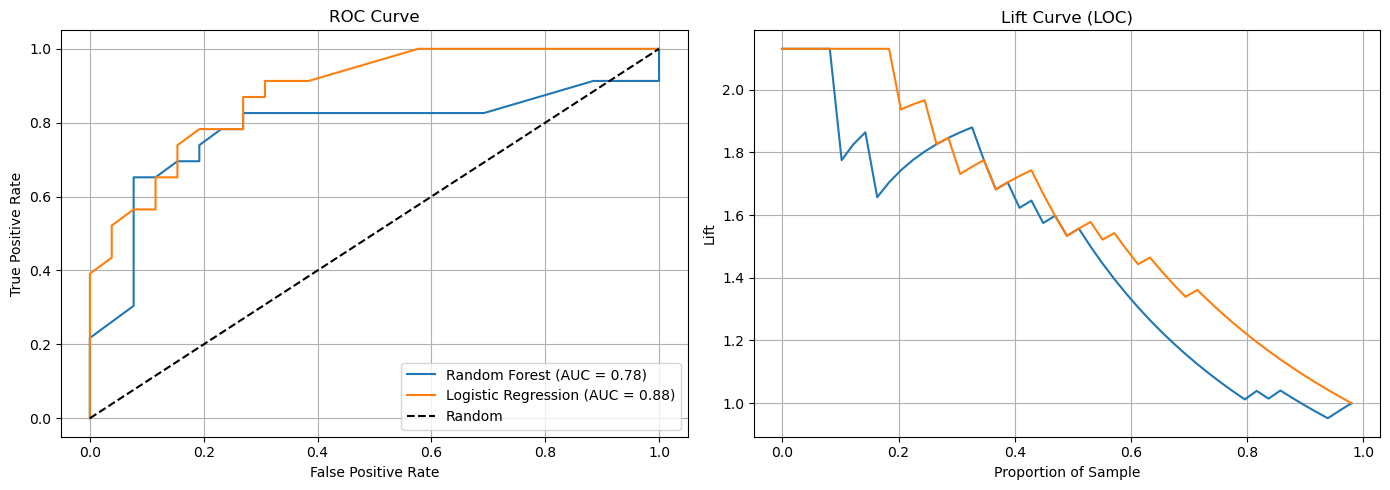

In [149]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ROC and Lift Curve Plot Function
def evaluate_models_roc_loc(models, model_param, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(14, 5))

    # ROC Plot
    plt.subplot(1, 2, 1)
    for name, model, _ in models:
        best_model = model.set_params(**model_param[name])
        best_model.fit(X_train, y_train)
        
        # Predict probabilities
        y_proba = best_model.predict_proba(X_test)[:, 1]
        
        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
        print(f'AUC Score for {name}: {auc:.3f}')
    
    # Random model line
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # ROC Plot settings
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)

    # Lift Curves
    plt.subplot(1, 2, 2)
    for name, model, _ in models:
        best_model = model.set_params(**model_param[name])
        best_model.fit(X_train, y_train)
        
        # Predict probabilities
        y_proba = best_model.predict_proba(X_test)[:, 1]
        
        # Plot Lift Curve for the current model
        plot_lift_curve(y_test, y_proba, model_name=name)
        
    plt.tight_layout()
    plt.show()

# Call the function with your models
evaluate_models_roc_loc(randomcv_models, model_param, X_train, y_train, X_test, y_test)